<a href="https://colab.research.google.com/github/ripky/OFA/blob/main/QUIS_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#upload files menggunakan packages 
from google.colab import files
upload = files.upload()
upload

In [2]:
#panggil masing masing data/read
Transactions= pd.read_csv('Transactions.csv')
Customer =pd.read_csv('Customer.csv')
Prod = pd.read_csv('prod_cat_info.csv')

In [3]:
#gabungkan data dengan fungsi merge
transaction_customer = pd.merge(Transactions,Customer,left_on='cust_id',right_on='customer_Id')
data = pd.merge(transaction_customer,Prod,left_on=['prod_subcat_code','prod_cat_code'] ,right_on=['prod_cat_code', 'prod_cat_code'])

In [4]:
#print data
data

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids
3,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
4,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,18727956164,267161,23-02-2011,4,4,5,668,350.70,3690.70,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
5001,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,1,Mens
5002,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women
5003,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,273723,21-01-1984,F,4.0,Bags,1,Mens


In [5]:
#cek data yang hilang 
data.isna().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
customer_Id          0
DOB                  0
Gender               6
city_code            0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [6]:
#menghapus kolom data yang hilang 
data.dropna(inplace=True)

In [7]:
#cek kembali data yang kosong
data.isna().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
customer_Id          0
DOB                  0
Gender               0
city_code            0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

**Deskripsi**

In [8]:
#mendiskripsikan data keseluruhan 
data.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
count,4.999000e+03,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,5.060428e+10,271024.033607,2.194239,2.194239,2.375475,614.177636,252.054401,2049.678846,271024.033607,5.613923,2.600320
std,2.893407e+10,2431.523746,1.468653,1.468653,2.382754,636.137375,190.819457,2620.721577,2431.523746,2.859203,1.356106
min,1.086136e+07,266794.000000,1.000000,1.000000,-5.000000,-1488.000000,7.455000,-8154.900000,266794.000000,1.000000,1.000000
25%,2.625969e+10,268969.000000,1.000000,1.000000,1.000000,293.000000,94.710000,704.990000,268969.000000,3.000000,1.000000
50%,5.007761e+10,271004.000000,1.000000,1.000000,3.000000,670.000000,202.230000,1720.485000,271004.000000,6.000000,3.000000
75%,7.610854e+10,273172.000000,4.000000,4.000000,4.000000,1102.500000,367.605000,3552.575000,273172.000000,8.000000,4.000000
max,9.998675e+10,275261.000000,4.000000,4.000000,5.000000,1499.000000,786.975000,8281.975000,275261.000000,10.000000,4.000000


**korelasi**

In [9]:
korelasi =data.corr()
korelasi

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
transaction_id,1.000000,0.012225,-0.022311,-0.022311,-0.034273,-0.022433,-0.017190,-0.031888,0.012225,0.013454,0.001342
cust_id,0.012225,1.000000,-0.051172,-0.051172,-0.000881,-0.008999,0.014824,0.002430,1.000000,-0.006863,0.003079
prod_subcat_code,-0.022311,-0.051172,1.000000,1.000000,-0.007409,-0.010242,-0.008569,-0.012313,-0.051172,0.018339,-0.060166
prod_cat_code,-0.022311,-0.051172,1.000000,1.000000,-0.007409,-0.010242,-0.008569,-0.012313,-0.051172,0.018339,-0.060166
Qty,-0.034273,-0.000881,-0.007409,-0.007409,1.000000,0.621301,0.257655,0.802600,-0.000881,-0.002859,0.000446
Rate,-0.022433,-0.008999,-0.010242,-0.010242,0.621301,1.000000,0.345090,0.849693,-0.008999,-0.018023,0.000616
Tax,-0.017190,0.014824,-0.008569,-0.008569,0.257655,0.345090,1.000000,0.571454,0.014824,-0.032258,0.000516
total_amt,-0.031888,0.002430,-0.012313,-0.012313,0.802600,0.849693,0.571454,1.000000,0.002430,-0.013809,0.000741
customer_Id,0.012225,1.000000,-0.051172,-0.051172,-0.000881,-0.008999,0.014824,0.002430,1.000000,-0.006863,0.003079
city_code,0.013454,-0.006863,0.018339,0.018339,-0.002859,-0.018023,-0.032258,-0.013809,-0.006863,1.000000,-0.001103


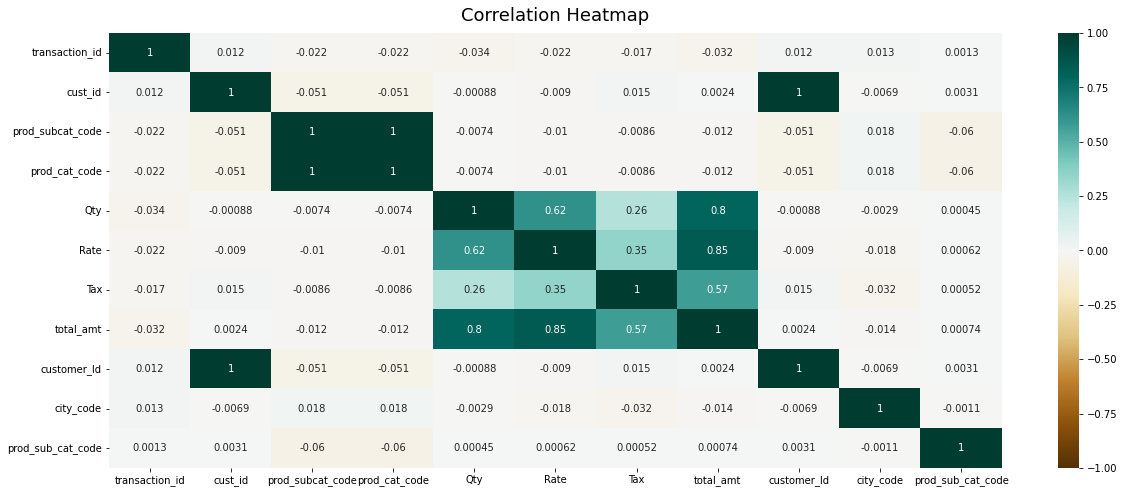

In [10]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(korelasi, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [11]:
#melihat jumlah data pada variabel gender 
sex =data['Gender'].value_counts()
sex

M    2587
F    2412
Name: Gender, dtype: int64

In [ ]:
#membuat variabel gender menjadi variabel dummy
gender_dummies=pd.get_dummies(data['Gender'])
#print dan melihat jumlah variabel yang d rubahh pada awal
gender_dummies.head(20)

In [13]:
#menggabungkan variabel dummy dengan dataset di awal
data=pd.concat([data,gender_dummies],axis=1)
data.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,F,M
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens,0,1
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women,0,1


**melihat jumlah data yang tersedia**

In [14]:
#kode untuk melihat jumlah dataset
data.shape

(4999, 19)

In [20]:
#untuk melihat jumlah data kategori pada variabel prod_cat
pc =data['prod_cat'].value_counts()
pc

Clothing    3009
Bags        1990
Name: prod_cat, dtype: int64

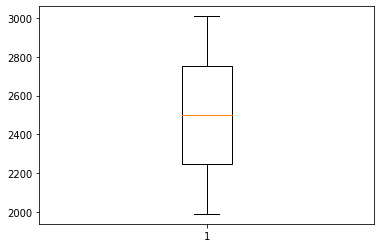

In [19]:
#boxplot variabel prod_cat
plt.boxplot(data['prod_cat'].value_counts())
plt.show()

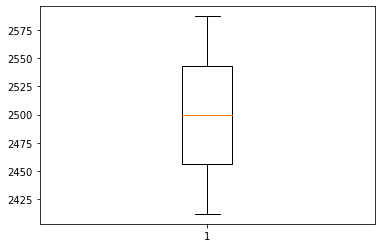

In [20]:
#boxplot gender kategori perempuan
plt.boxplot(data['F'].value_counts())
plt.show()

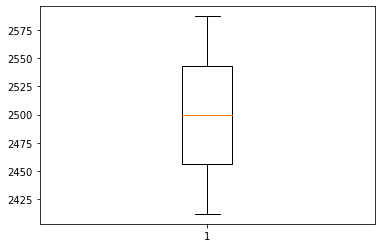

In [21]:
#boxplot gender kategori laki-laki
plt.boxplot(data['M'].value_counts())
plt.show()

# **Visualisasi**

**laki-laki VS perempuan**

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

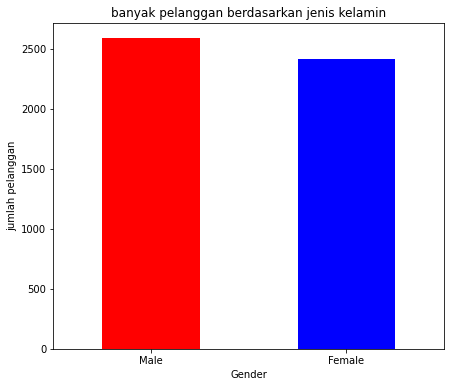

In [17]:
#diagram batang
#untuk membuat ukuran box
plt.figure(figsize=(7, 6))
#kode untuk membuat bar pllot pada variabel sex dengan warna yang berbeda
ax = sex.plot(kind='bar', rot=0, color=["red","blue"])
#membuat judul pada diagram batang
ax.set_title("banyak pelanggan berdasarkan jenis kelamin", y = 1)
#untuk memberi nama garis X
ax.set_xlabel('Gender')
#untuk memberi nama garis Y
ax.set_ylabel('jumlah pelanggan')
#untuk memberi nama pada tiap diagram batang
ax.set_xticklabels(('Male', 'Female'))

**prod_cat yang diminati perempuan**

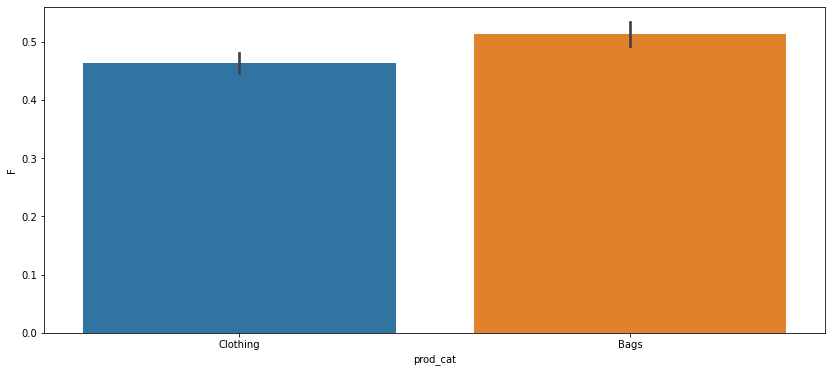

In [25]:
plt.figure(figsize=(14,6))
#diagram batang variabel prod_cat dengan male/jenis kelamin perempuan 
sns.barplot(x='prod_cat',y='F',data=data)

**prod_cat yang diminati laki-laki**

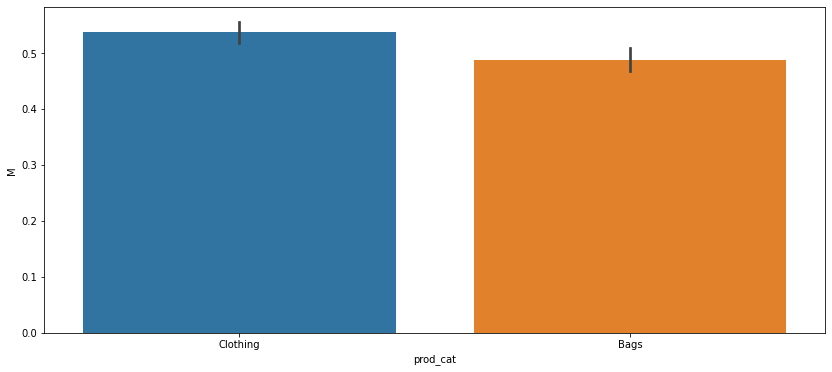

In [26]:
#diagram batang variabel prod_cat dengan male/jenis kelamin laki laki
plt.figure(figsize=(14,6))
sns.barplot(x='prod_cat',y='M',data=data)

**story type yang paling banyk diakses pelanggan dalam bentuk persen**

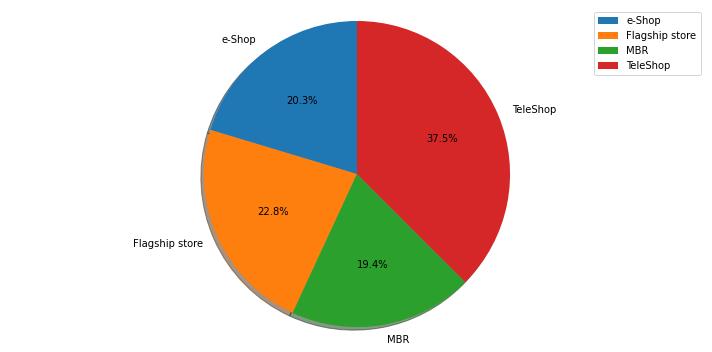

In [29]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10,5))
#memasukan variabel dalam jumlah persen dan mendiskrisipkan terhadap story_type
ax1.pie(data.groupby('Store_type')['total_amt'].sum(),explode=None, labels=data['Store_type'].unique(), autopct='%1.1f%%',shadow=True, startangle=90)

# Equal digunakan agar pie chart berbentuk lingkaran
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()


In [30]:
#menambahkan variabel baru month berdasarkan hari transaksi
data['month'] = pd.DatetimeIndex(data['tran_date']).month
data

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,F,M,month
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens,0,1,2
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women,0,1,2
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids,0,1,2
3,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens,0,1,2
4,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,18727956164,267161,23-02-2011,4,4,5,668,350.70,3690.70,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women,0,1,2
5001,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,1,Mens,1,0,2
5002,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women,1,0,2
5003,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,273723,21-01-1984,F,4.0,Bags,1,Mens,1,0,1


**menenutukan jumlah bulan pada month**

In [44]:
jumlah = data["month"].value_counts()
jumlah

10    478
1     473
3     432
11    432
7     422
9     422
8     411
6     407
5     407
2     380
4     369
12    366
Name: month, dtype: int64

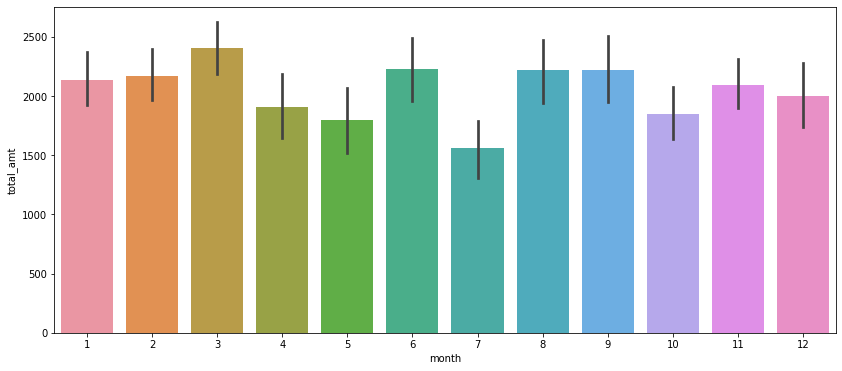

In [31]:
#diagram batang total amount terhadap bulan penjualan selama satu tahun
plt.figure(figsize=(14,6))
sns.barplot(x='month',y='total_amt',data=data)